In [2]:
import numpy as np
import seaborn as sns
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

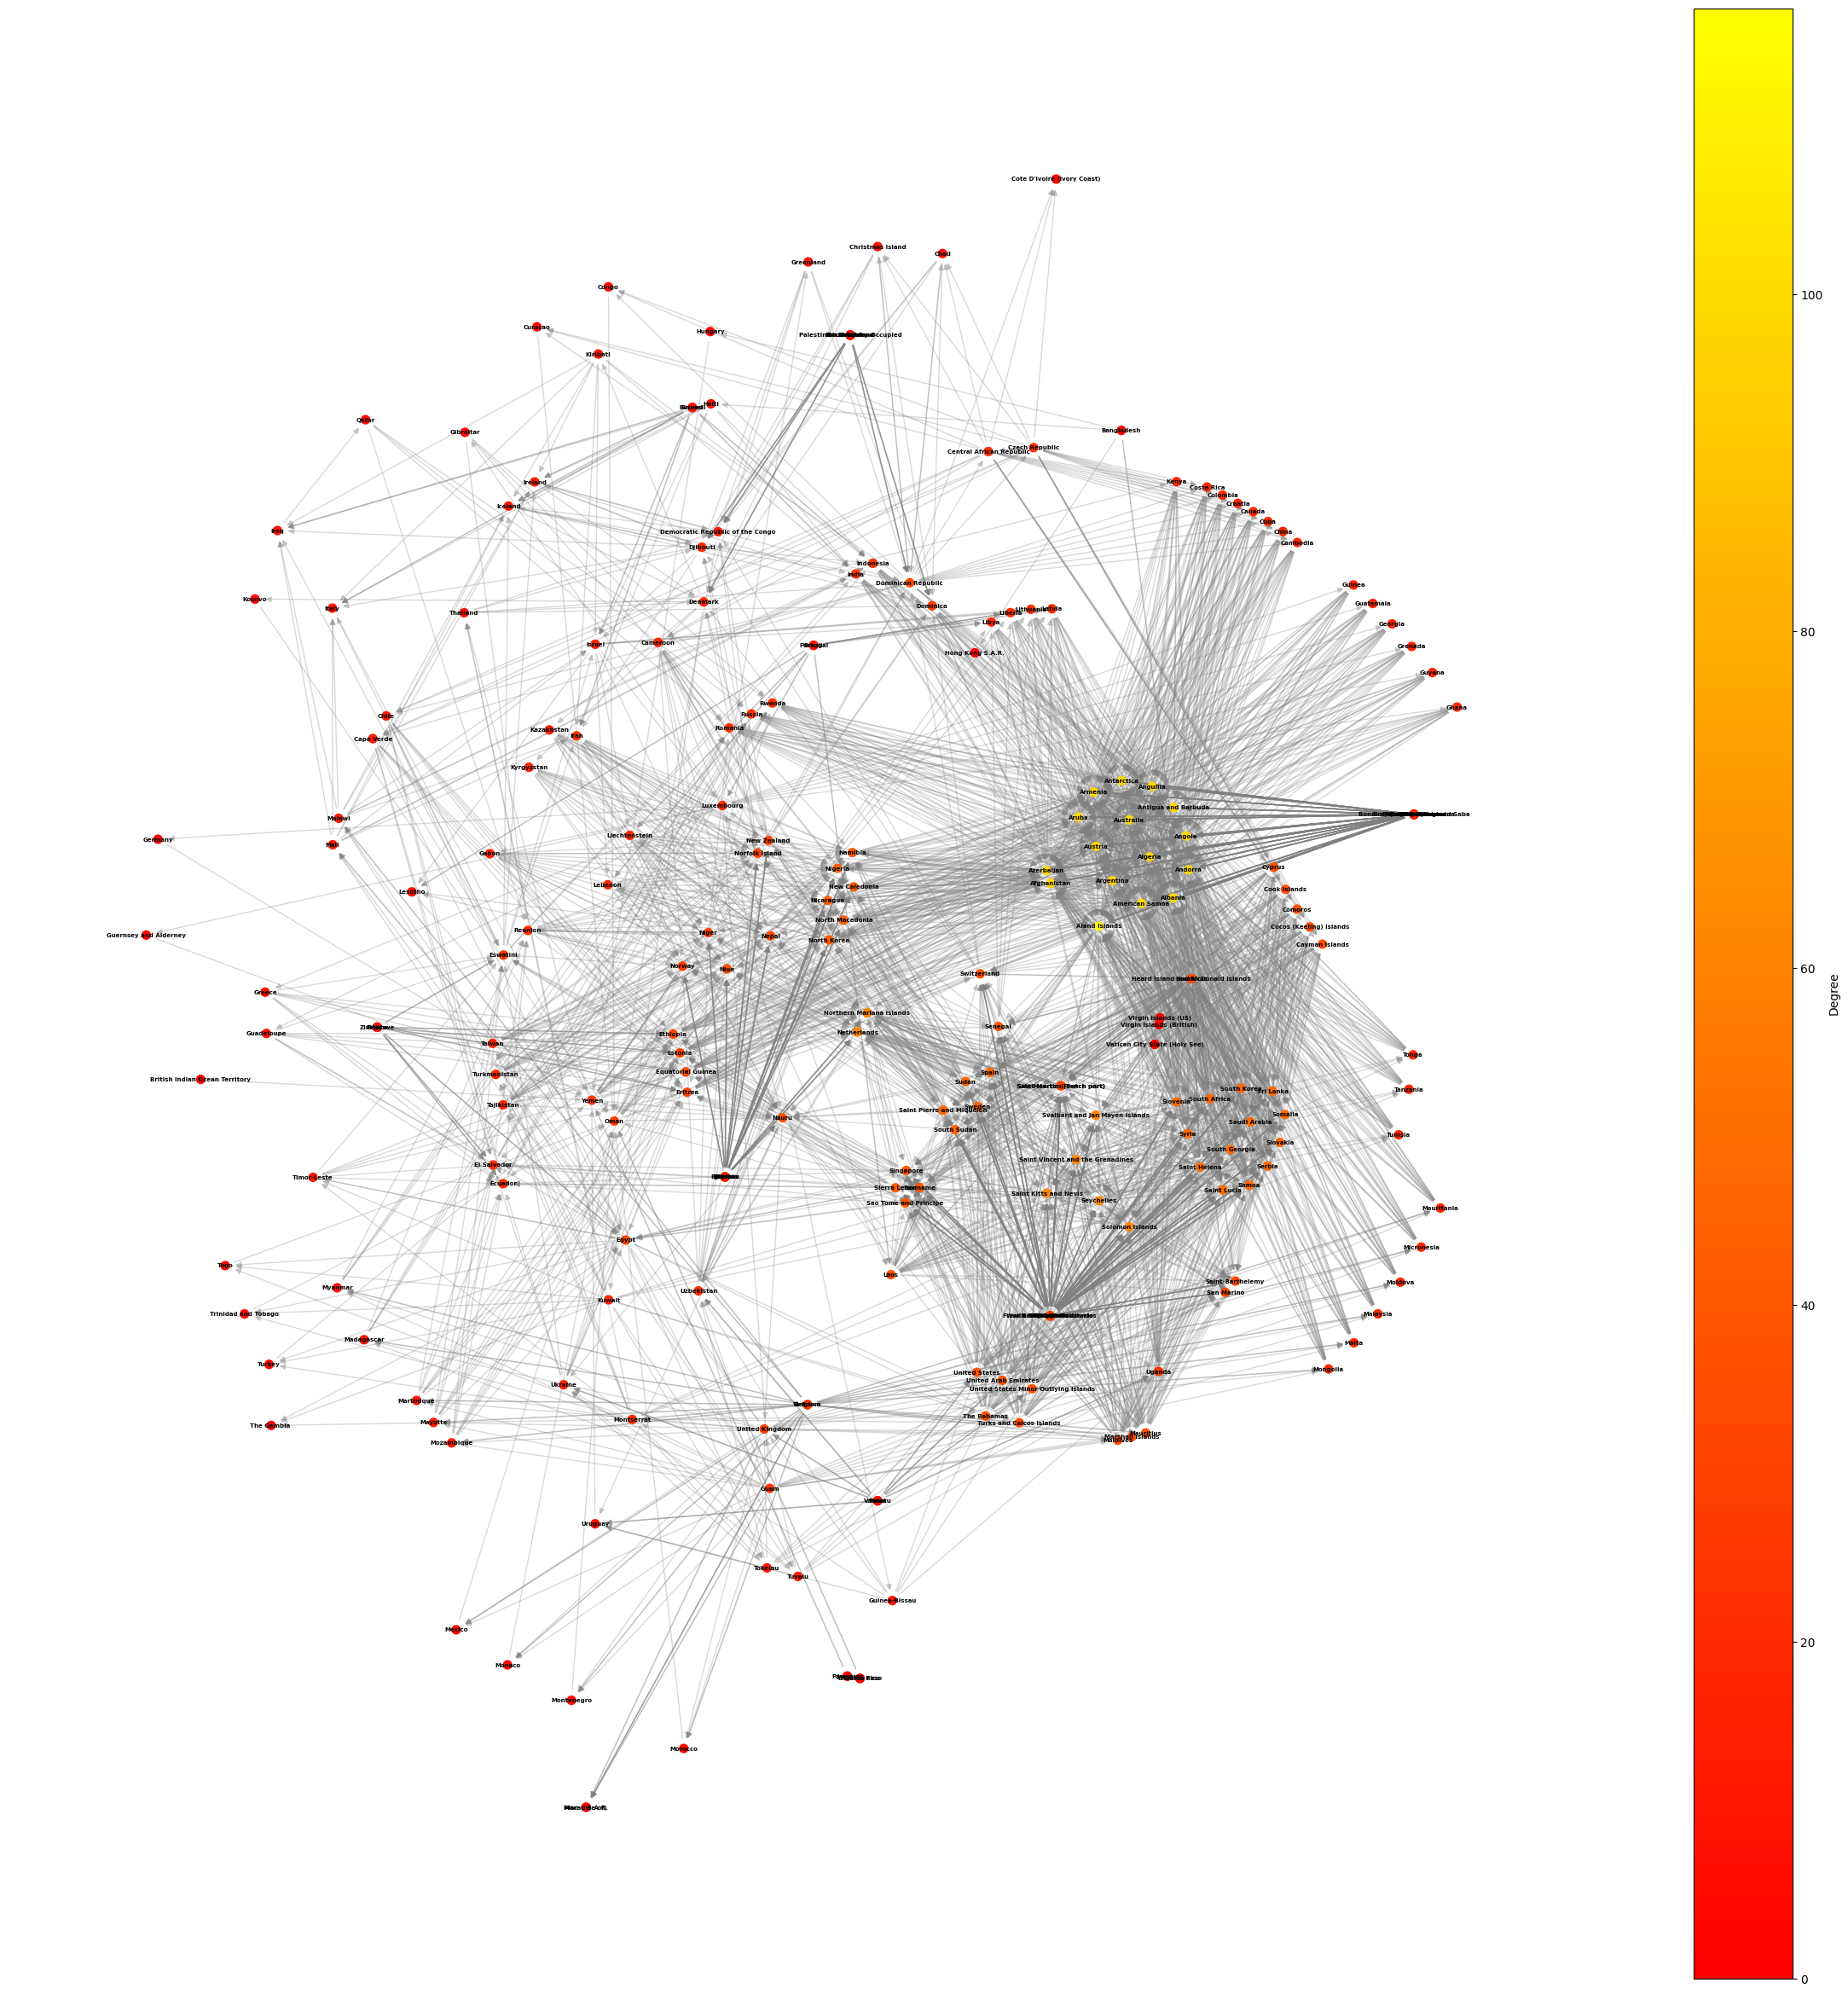

In [3]:
# Read the CSV into a DataFrame
df = pd.read_csv('CSV/Used/countries.csv', usecols=['name'])

# Initialize the graph
G = nx.DiGraph()

# Extract the list of country names
countries = df['name'].tolist()

# Add nodes to the graph
G.add_nodes_from(countries)

# Add edges based on the condition
for country1 in countries:
    for country2 in countries:
        if country1 != country2 and country1[-1].lower() == country2[0].lower():
            G.add_edge(country1, country2)

# Calculate node degrees
degrees = dict(G.degree())

# Create a list of node colors based on their degree
node_colors = [degrees[node] for node in G.nodes()]

# Normalize the node colors for colormap
norm = mcolors.Normalize(vmin=min(node_colors), vmax=max(node_colors))
cmap = cm.autumn

# Create the plot
fig, ax = plt.subplots(figsize=(30, 30))
pos = nx.kamada_kawai_layout(G)

# Draw nodes and edges with color mapping
nodes = nx.draw_networkx_nodes(
    G, pos, ax=ax, node_size=50, node_color=node_colors, cmap=cmap
)
nx.draw_networkx_edges(G, pos, ax=ax, alpha=0.3, edge_color='gray')
nx.draw_networkx_labels(G, pos, ax=ax, font_size=5, font_color='black', font_weight='bold')

# Create a ScalarMappable and add a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='Degree')

# Show the plot
plt.axis('off')
plt.show()

In [4]:
# Get in-degree and out-degree

# Get in-degree and out-degree
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())

# Sort nodes by in-degree
sorted_by_in_degree = sorted(in_degrees.items(), key=lambda x: x[1], reverse=True)

print("Node | In-Degree | Out-Degree")
print("-----------------------------")
for node, in_degree in sorted_by_in_degree:
    out_degree = out_degrees[node]
    print(f"{node}    | {in_degree}         | {out_degree}")

Node | In-Degree | Out-Degree
-----------------------------
Afghanistan    | 84         | 15
Aland Islands    | 84         | 33
Azerbaijan    | 84         | 15
Albania    | 83         | 15
Algeria    | 83         | 15
American Samoa    | 83         | 15
Andorra    | 83         | 15
Angola    | 83         | 15
Anguilla    | 83         | 15
Antarctica    | 83         | 15
Antigua and Barbuda    | 83         | 15
Argentina    | 83         | 15
Armenia    | 83         | 15
Aruba    | 83         | 15
Australia    | 83         | 15
Austria    | 83         | 15
Saint Helena    | 32         | 16
Saint Lucia    | 32         | 16
Saint Pierre and Miquelon    | 32         | 15
Saint-Barthelemy    | 32         | 1
Saint-Martin (French part)    | 32         | 0
Samoa    | 32         | 16
San Marino    | 32         | 1
Sao Tome and Principe    | 32         | 8
Saudi Arabia    | 32         | 16
Senegal    | 32         | 9
Serbia    | 32         | 16
Sierra Leone    | 32         | 8
Singapore    | 32 

We notice that indegree 0 countries are irrelevant from the perspective of the game, so we remove them

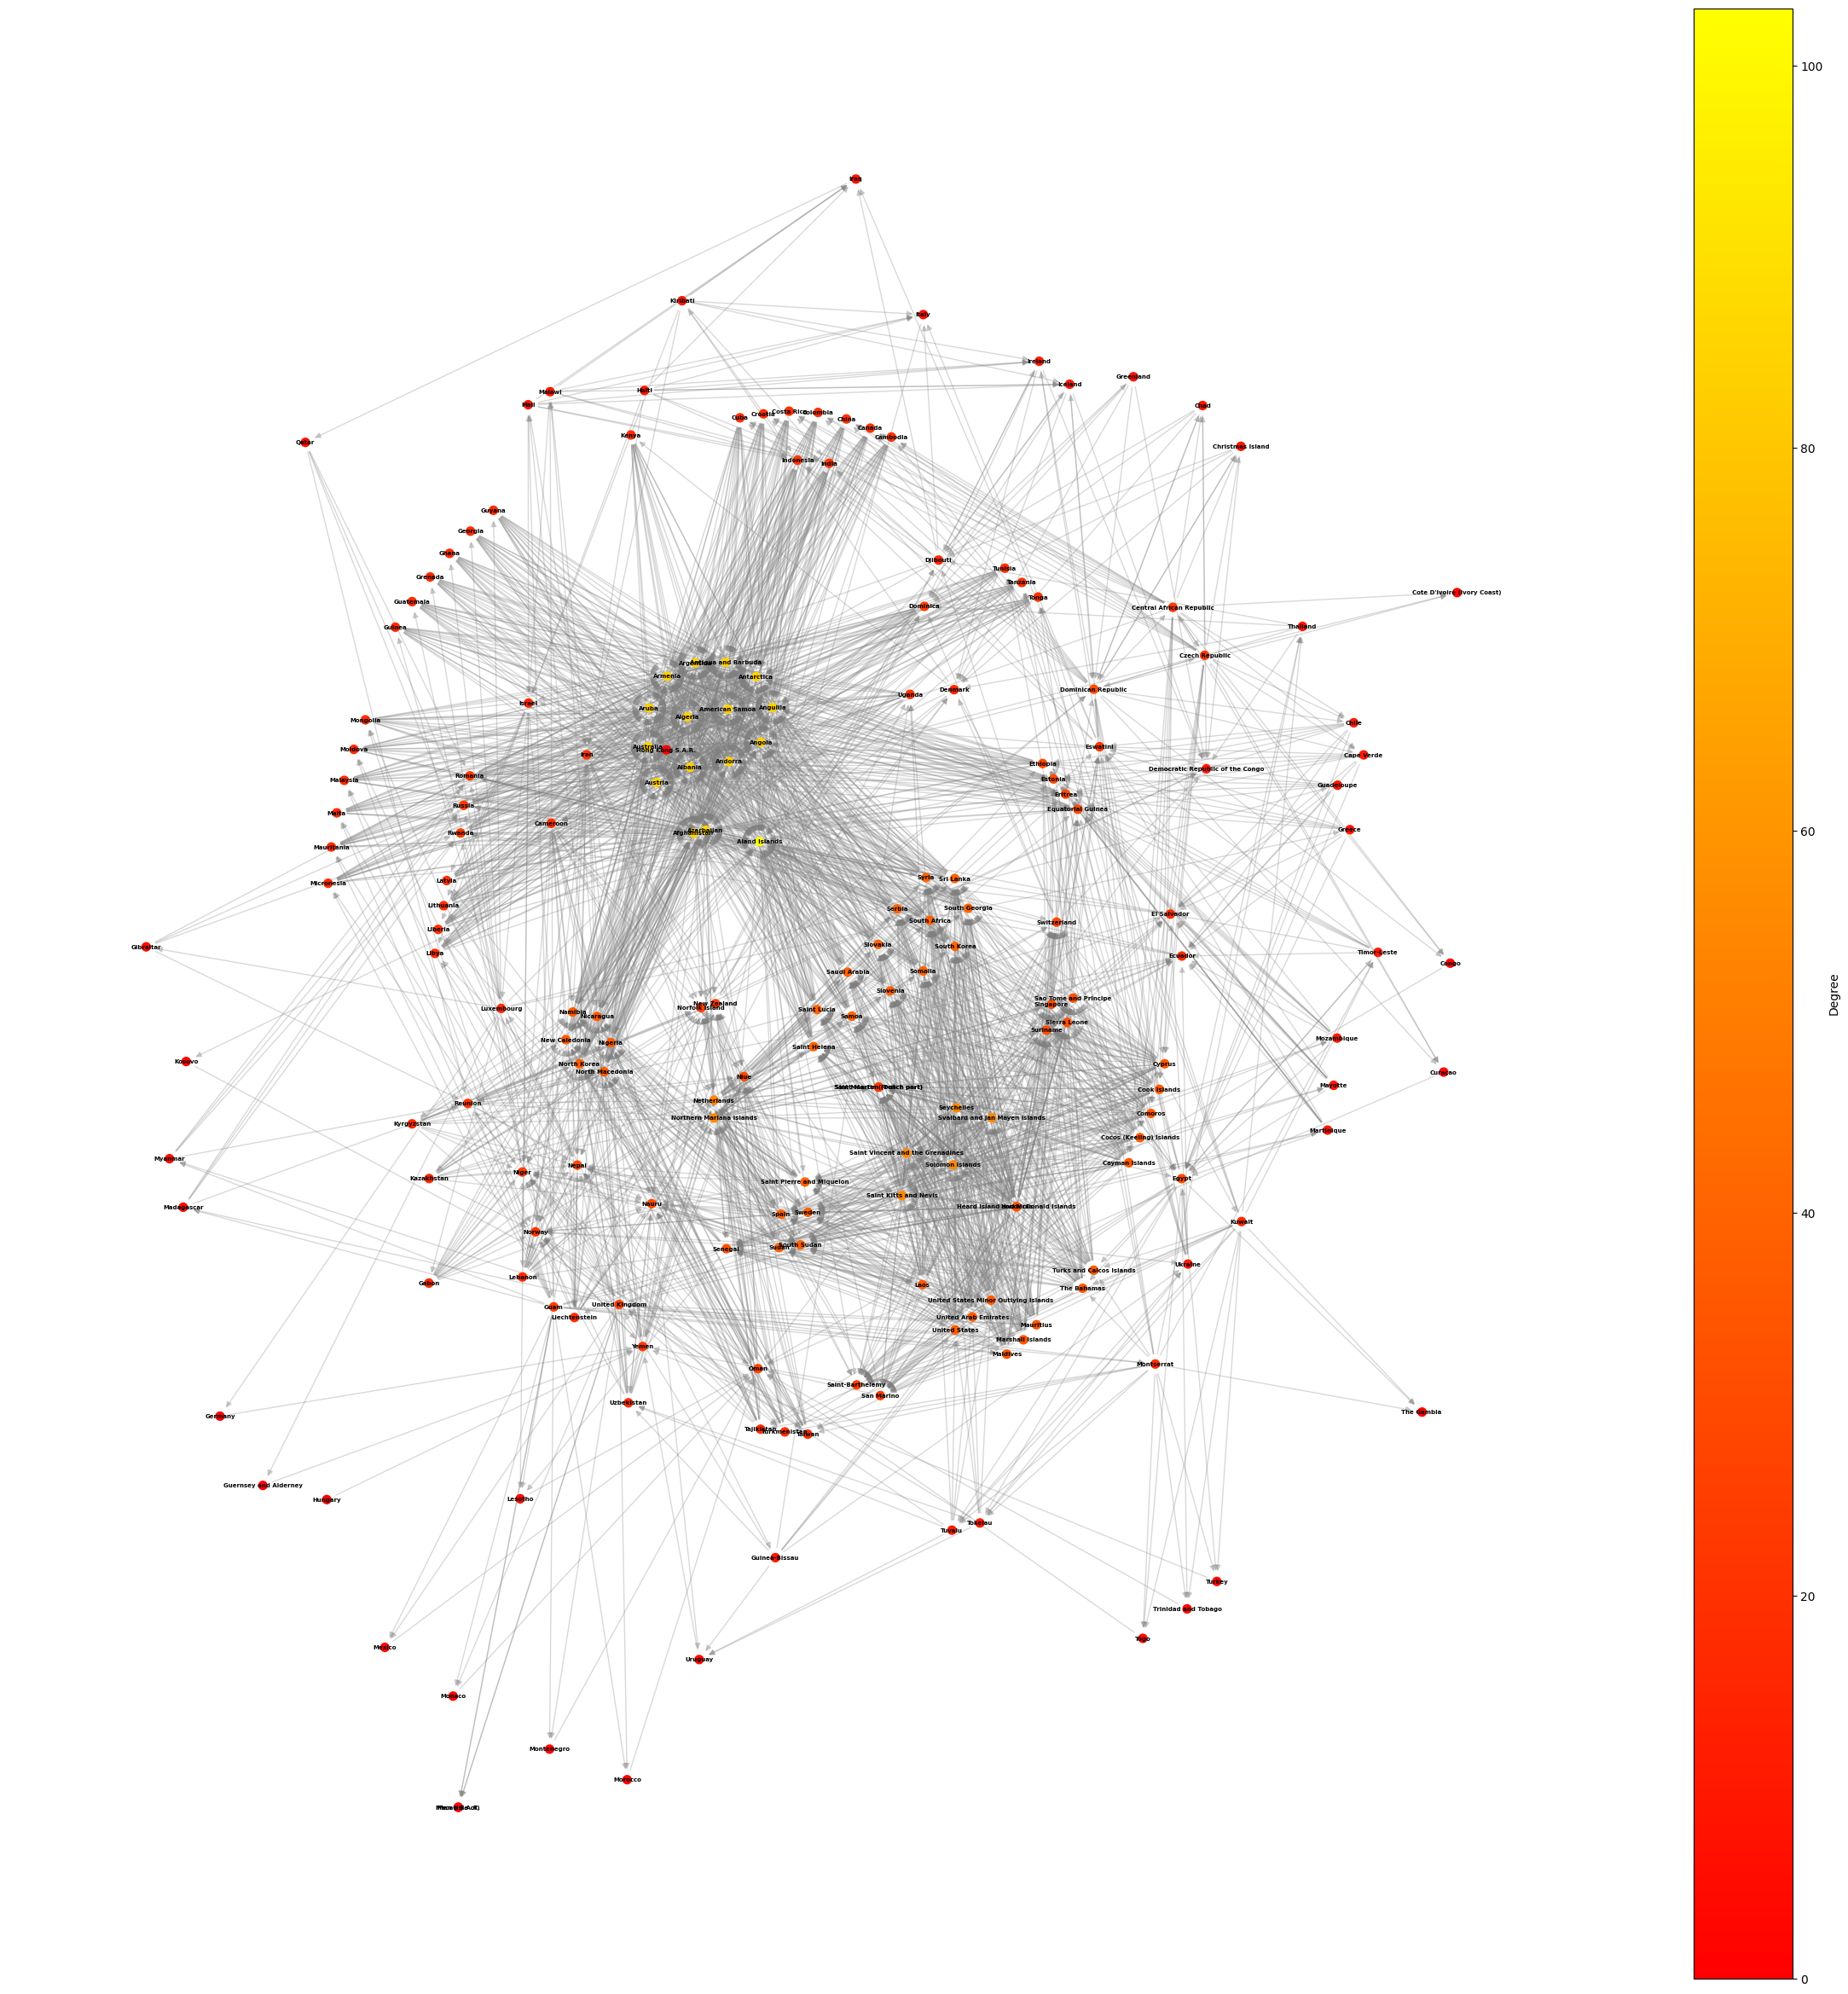

In [5]:
nodes_to_remove = [node for node, indeg in G.in_degree() if indeg == 0]
G.remove_nodes_from(nodes_to_remove)

# Calculate node degrees
degrees = dict(G.degree())

# Create a list of node colors based on their degree
node_colors = [degrees[node] for node in G.nodes()]

# Normalize the node colors for colormap
norm = mcolors.Normalize(vmin=min(node_colors), vmax=max(node_colors))
cmap = cm.autumn

# Create the plot
fig, ax = plt.subplots(figsize=(30, 30))
pos = nx.kamada_kawai_layout(G)

# Draw nodes and edges with color mapping
nodes = nx.draw_networkx_nodes(
    G, pos, ax=ax, node_size=50, node_color=node_colors, cmap=cmap
)
nx.draw_networkx_edges(G, pos, ax=ax, alpha=0.3, edge_color='gray')
nx.draw_networkx_labels(G, pos, ax=ax, font_size=5, font_color='black', font_weight='bold')

# Create a ScalarMappable and add a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='Degree')

# Show the plot
plt.axis('off')
plt.show()